In [30]:
import numpy as np

import pandas as pd

from numpy.linalg import eig

import matplotlib.pyplot as plt

In [31]:
# Principal Component Analysis

In [35]:
class PC() :
    
    
    def __init__( self, no_of_components ) :
        
        self.no_of_components = no_of_components
        
    
    
    #  ---------- helper mathematical functions----------------
    
    
    
    # calculate variance
        
    def variance( self, x ) :
        
        return ( np.sum( np.square( x - np.mean( x ) ) ) ) / np.size( x )
    
    
    # calculate co-variance between two vectors 
    
    def covariance( self, x, y ) :
        
        return np.matmul( x - np.mean( x ), y - np.mean( y ) ) / ( np.size( x ) - 1 )  
    
    
    # calculate co-variance matrix for a matrix X
    
    def cov_matrix( self, A ) :
        
        features, trials = A.shape
    
        A_cov  = np.zeros( ( features, features ) )
    
        for i in range( features ) :
            
            for j in range( features ) :
                
                A_cov[i][j] = self.covariance( A[i], A[j] )
                
        return A_cov
    
    
    
    # -----------pca algorithm------------------------------
    
    
    
    def transformation( self, X ) :
        
        # centralize
    
        mean = np.mean( X, 0 )
        
        X_stand = X - mean
    
        # calculate co-variance matrix
    
        X_cov = self.cov_matrix( np.transpose( X_stand ) )
    
        # find the eigenvalues and eigenvectors
    
        e, V = eig( X_cov )
        
        # sort eigen vector according to eigen values 
        
        idx = np.argsort( -e )

        e = e[idx]

        V = V[:,idx]
    
        # select the principal components from first
        
        p = V[:,:self.no_of_components]
    
        # project the original dataset
    
        X_transform = np.dot( X_stand, p )
        
        return X_transform

In [36]:
# raw data with ( 10, 3 ) dimensions             ------( no_of_examples, no_of_features )

In [37]:
X = np.random.rand( 10, 3 )

In [38]:
# self created PCA

model1 = PC( no_of_components = 2 )

X_transform1 = model1.transformation( X )

In [39]:
X_transform1

array([[-0.48782203,  0.05994409],
       [ 0.58348127, -0.1198156 ],
       [-0.45692474,  0.17797262],
       [ 0.35477825,  0.10505097],
       [-0.25314459, -0.50355603],
       [ 0.10074944,  0.69191266],
       [ 0.19161988, -0.22028106],
       [-0.28693991, -0.08910064],
       [-0.18297639, -0.01179005],
       [ 0.43717882, -0.09033696]])

In [40]:
# scikit learn PCA

In [41]:
from sklearn.decomposition import PCA

model2 = PCA( n_components = 2 )

X_transform2 = model2.fit_transform( X )

In [42]:
X_transform2

array([[-0.48782203,  0.05994409],
       [ 0.58348127, -0.1198156 ],
       [-0.45692474,  0.17797262],
       [ 0.35477825,  0.10505097],
       [-0.25314459, -0.50355603],
       [ 0.10074944,  0.69191266],
       [ 0.19161988, -0.22028106],
       [-0.28693991, -0.08910064],
       [-0.18297639, -0.01179005],
       [ 0.43717882, -0.09033696]])

In [43]:
# PCA on Iris Dataset

In [44]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame( data = iris.data, columns = iris.feature_names ) 

df['class'] = iris.target

In [45]:
X = df.drop( labels='class', axis = 1 ).values

y = df['class'].values

In [46]:
# self created PCA

model1 = PC( no_of_components = 2 )

X_transform1 = model1.transformation( X )

In [47]:
X_transform1

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

In [48]:
# variances captured in both components

In [49]:
var1 = model1.variance( X_transform1[:,:1] )

print( var1 )

var2 = model1.variance( X_transform1[:,1:] )

print( var2 )

4.20005342799463
0.24105294294244256


In [50]:
# variance ratio 

In [51]:
print( var1 / ( var1 + var2 ) ) 

print( var2 / ( var1 + var2 ) )

0.9457223216899486
0.05427767831005147


Text(0, 0.5, 'PC2')

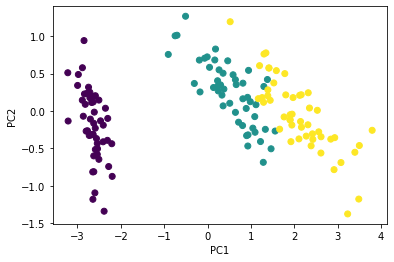

In [52]:
plt.scatter( X_transform1[:, 0], X_transform1[:, 1], c = y )

plt.xlabel( "PC1" )

plt.ylabel( "PC2" )

In [53]:
# scikit learn PCA

In [54]:
from sklearn.decomposition import PCA

model2 = PCA( n_components = 2 )

X_transform2 = model2.fit_transform( X )

In [55]:
X_transform2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [56]:
# variance ratio

In [57]:
model2.explained_variance_ratio_

array([0.92461872, 0.05306648])

Text(0, 0.5, 'PC2')

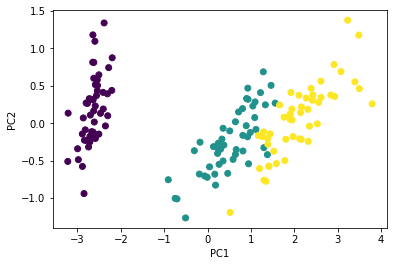

In [58]:
plt.scatter( X_transform2[:, 0], X_transform2[:, 1], c = y )

plt.xlabel( "PC1" )

plt.ylabel( "PC2" )